<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.2 MB/s eta 0:00:00


MedicationDose 63.319882172475516
IVAdjustment 69.61549707602339
OxygenTherapy 9.577777777777778


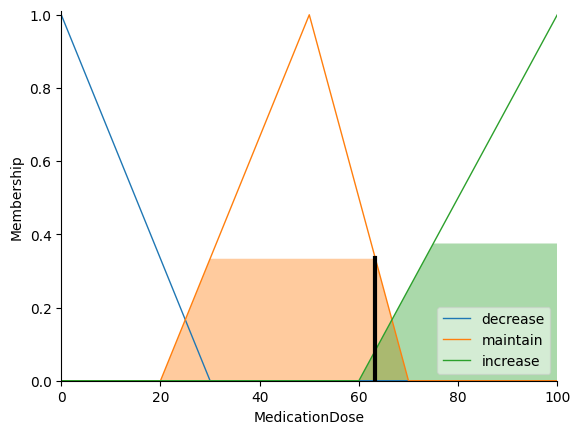

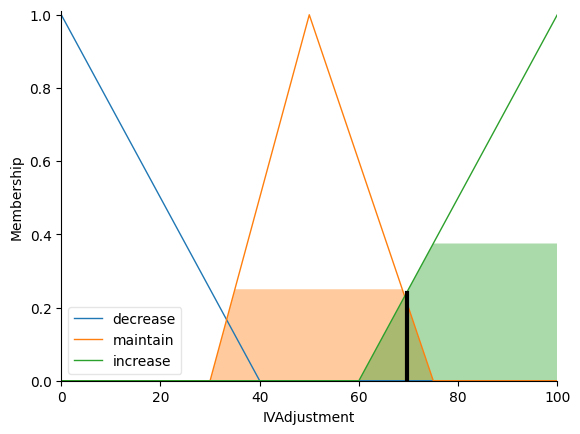

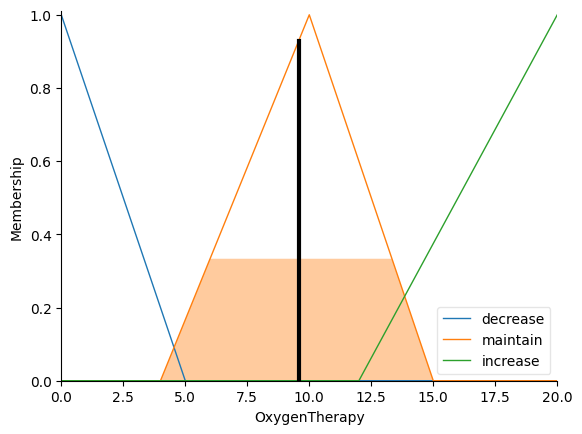

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

HeartRate = ctrl.Antecedent(np.arange(30, 181, 1), 'HeartRate')
BloodPressure = ctrl.Antecedent(np.arange(50, 201, 1), 'BloodPressure')
BodyTemp = ctrl.Antecedent(np.arange(34, 41, 0.1), 'BodyTemp')
OxygenSat = ctrl.Antecedent(np.arange(70, 101, 1), 'OxygenSat')
BloodSugar = ctrl.Antecedent(np.arange(40, 301, 1), 'BloodSugar')

MedicationDose = ctrl.Consequent(np.arange(0, 101, 1), 'MedicationDose')
IVAdjustment = ctrl.Consequent(np.arange(0, 101, 1), 'IVAdjustment')
OxygenTherapy = ctrl.Consequent(np.arange(0, 21, 1), 'OxygenTherapy')

HeartRate['low'] = fuzz.trimf(HeartRate.universe, [30, 30, 60])
HeartRate['normal'] = fuzz.trimf(HeartRate.universe, [55, 75, 100])
HeartRate['high'] = fuzz.trimf(HeartRate.universe, [90, 130, 180])

BloodPressure['low'] = fuzz.trimf(BloodPressure.universe, [50, 60, 90])
BloodPressure['normal'] = fuzz.trimf(BloodPressure.universe, [85, 110, 125])
BloodPressure['high'] = fuzz.trimf(BloodPressure.universe, [120, 150, 200])

BodyTemp['low'] = fuzz.trimf(BodyTemp.universe, [34, 35, 37])
BodyTemp['normal'] = fuzz.trimf(BodyTemp.universe, [36, 36.8, 38.5])
BodyTemp['high'] = fuzz.trimf(BodyTemp.universe, [37.5, 38.5, 40])

OxygenSat['low'] = fuzz.trimf(OxygenSat.universe, [70, 80, 89])
OxygenSat['normal'] = fuzz.trimf(OxygenSat.universe, [88, 94, 100])

BloodSugar['low'] = fuzz.trimf(BloodSugar.universe, [40, 55, 70])
BloodSugar['normal'] = fuzz.trimf(BloodSugar.universe, [60, 100, 140])
BloodSugar['high'] = fuzz.trimf(BloodSugar.universe, [120, 200, 300])

MedicationDose['decrease'] = fuzz.trimf(MedicationDose.universe, [0, 0, 30])
MedicationDose['maintain'] = fuzz.trimf(MedicationDose.universe, [20, 50, 70])
MedicationDose['increase'] = fuzz.trimf(MedicationDose.universe, [60, 100, 100])

IVAdjustment['decrease'] = fuzz.trimf(IVAdjustment.universe, [0, 0, 40])
IVAdjustment['maintain'] = fuzz.trimf(IVAdjustment.universe, [30, 50, 75])
IVAdjustment['increase'] = fuzz.trimf(IVAdjustment.universe, [60, 100, 100])

OxygenTherapy['decrease'] = fuzz.trimf(OxygenTherapy.universe, [0, 0, 5])
OxygenTherapy['maintain'] = fuzz.trimf(OxygenTherapy.universe, [4, 10, 15])
OxygenTherapy['increase'] = fuzz.trimf(OxygenTherapy.universe, [12, 20, 20])

rules = [
    ctrl.Rule(HeartRate['low'] & BloodPressure['low'], IVAdjustment['increase']),
    ctrl.Rule(HeartRate['low'] & BloodPressure['low'], MedicationDose['increase']),
    ctrl.Rule(HeartRate['high'] & BloodPressure['high'], MedicationDose['decrease']),
    ctrl.Rule(HeartRate['normal'] & BloodPressure['normal'], MedicationDose['maintain']),
    ctrl.Rule(HeartRate['normal'], IVAdjustment['maintain']),


    ctrl.Rule(BodyTemp['high'] & OxygenSat['low'], OxygenTherapy['increase']),
    ctrl.Rule(BodyTemp['high'] & OxygenSat['low'], MedicationDose['increase']),
    ctrl.Rule(BodyTemp['normal'] & OxygenSat['normal'], OxygenTherapy['maintain']),
    ctrl.Rule(BodyTemp['normal'] & OxygenSat['normal'], MedicationDose['maintain']),
    ctrl.Rule(BodyTemp['low'] & OxygenSat['low'], OxygenTherapy['increase']),
    ctrl.Rule(BodyTemp['low'] & OxygenSat['low'], IVAdjustment['increase']),

    ctrl.Rule(BloodSugar['high'], MedicationDose['increase']),
    ctrl.Rule(BloodSugar['low'], MedicationDose['decrease']),
    ctrl.Rule(BloodSugar['normal'], MedicationDose['maintain']),

    ctrl.Rule(BloodPressure['high'] & BloodSugar['high'] & HeartRate['high'], MedicationDose['decrease']),
    ctrl.Rule(BloodPressure['low'] & OxygenSat['low'] & HeartRate['low'], IVAdjustment['increase']),
    ctrl.Rule(BloodPressure['low'] & OxygenSat['low'] & HeartRate['low'], OxygenTherapy['increase']),
    ctrl.Rule(BloodPressure['low'] & OxygenSat['low'] & HeartRate['low'], MedicationDose['increase']),
    ctrl.Rule(BodyTemp['high'] & BloodPressure['high'] & OxygenSat['normal'], MedicationDose['increase']),
    ctrl.Rule(BodyTemp['high'] & BloodPressure['high'] & OxygenSat['normal'], OxygenTherapy['maintain']),
    ctrl.Rule(HeartRate['high'] & BloodPressure['normal'], IVAdjustment['maintain']),
    ctrl.Rule(BloodSugar['high'] & BloodPressure['normal'], IVAdjustment['increase']),

]
ctrl_sys = ctrl.ControlSystem(rules)
simulation_sys = ctrl.ControlSystemSimulation(ctrl_sys)

simulation_sys.input['HeartRate'] = 100
simulation_sys.input['BloodPressure'] = 100
simulation_sys.input['BodyTemp'] = 37
simulation_sys.input['OxygenSat'] = 90
simulation_sys.input['BloodSugar'] = 150

simulation_sys.compute()

print('MedicationDose',simulation_sys.output['MedicationDose'])
print('IVAdjustment',simulation_sys.output['IVAdjustment'])
print('OxygenTherapy',simulation_sys.output['OxygenTherapy'])
MedicationDose.view(sim=simulation_sys)
IVAdjustment.view(sim=simulation_sys)
OxygenTherapy.view(sim=simulation_sys)